In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 재시작 !

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings 
warnings.filterwarnings('ignore')

# LightGBM

- LightGBM 역시 사이킷런에서 제공하지 않기 떄문에 별도의 설치가 필요하다.  
- https://lightgbm.readthedocs.io/en/latest/index.html (LightGBM 공식문서)를 참고하여 설치

- LightGBM은 XGBoost보다 더 빠른 연산이 가능하고 메모리도 적게 사용한다 그러한 측면에서 대용량 데이터 셋에서 효율적이다. 그러나 너무 작은 데이터 셋에서는 과적합 될 우려가 높으니 주의하자.

In [2]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()

### LightGBM의 파라미터
- xgboost의 파라미터와 거의 동일하다.  
- max_depth : 트리의 깊이를 조정하는 파라미터  
- n_estimators : 반복할 결정 트리의 개수  
- learning_rate : 학습기 마다 가중치를 얼마나 줄 것인지를 설정하는 파라미터  
- boosting_type : xgboost의 booster파라미터와 같은 역할을 하지만 지원하는 모델이 다르다, gbdt(Gradient Boosted Decision Trees), rf(Random Forest), dart, goss(Gradient-based One-Sied Sampling)가 있다.  
    - goss는 계산속도를 줄여 주지만 예측력에서 손실이 있을 수 있다.  
- reg_alpha : L1 규제  
- reg_lambda : L2 규제

In [3]:
lgb_model

LGBMClassifier()

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify = cancer.target,
                                                   shuffle = True)

lgb_model = lgb.LGBMClassifier(max_depth=3, n_estimators=9, 
                               learning_rate=0.1).fit(X_train, y_train)

In [5]:
X_train.shape

(426, 30)

In [6]:
print('train score : {:.3f}'.format(lgb_model.score(X_train, y_train)))
print('test score : {:.3f}'.format(lgb_model.score(X_test, y_test)))

train score : 0.969
test score : 0.895


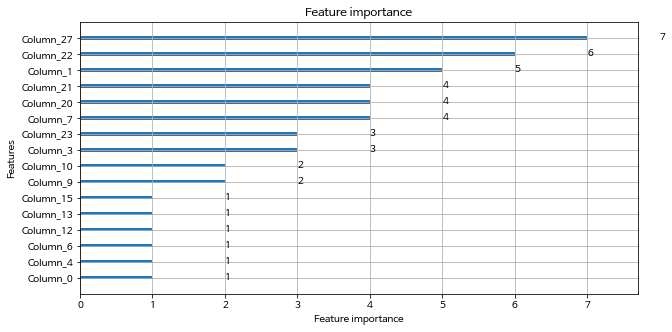

In [7]:
from lightgbm import plot_importance
fig, ax = plt.subplots(figsize = (10, 5))
plot_importance(lgb_model, ax=ax)
plt.show()

- XGBoost와 동일하게 plot_importance로 특성들의 유효성을 확인할 수 있다.

<AxesSubplot:>

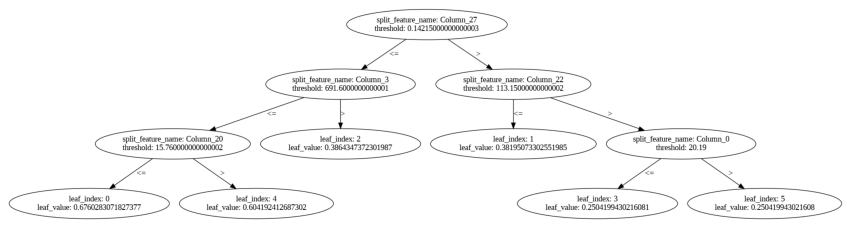

In [8]:
from lightgbm import plot_tree
fig, ax = plt.subplots(figsize = (15, 10))
plot_tree(lgb_model, ax=ax)

- plot_tree를 이용해서 LightGBM의 트리구조를 시각화할 수 있다.

In [9]:
from sklearn.datasets import load_wine

wine = load_wine()

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,
                                                   test_size = 0.3, shuffle = True)

In [10]:
X_train.shape

(124, 13)

In [11]:
lgb_model = lgb.LGBMClassifier(max_depth=3, n_estimators=100,
                               learning_rate=0.01).fit(X_train, y_train)

print('train score : {:.3f}'.format(lgb_model.score(X_train, y_train)))
print('test score : {:.3f}'.format(lgb_model.score(X_test, y_test)))

train score : 0.992
test score : 0.981


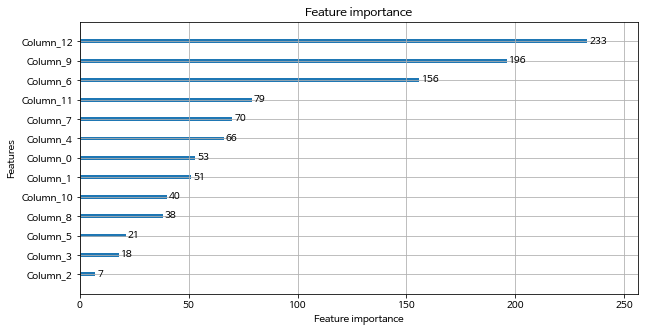

In [12]:
fig, ax = plt.subplots(figsize = (10, 5))
plot_importance(lgb_model, ax=ax)
plt.show()

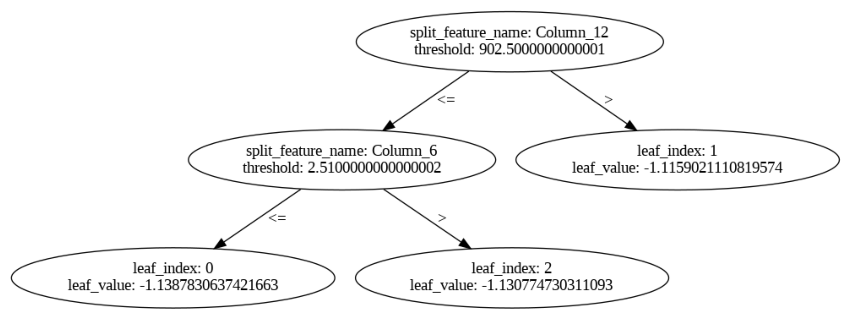

In [13]:
fig, ax = plt.subplots(figsize = (15, 10))
plot_tree(lgb_model, ax=ax)
plt.show()